## Project Summary

The objective of this project is to develop a predictive model to estimate house prices based on key property characteristics. By analyzing historical property sales data, we aim to create a model that can accurately predict the sale price of a house, providing valuable insights to stakeholders in the real estate industry, such as buyers, sellers, and real estate agents.

## 1. Business Understanding


Objective: To build a machine learning model that accurately predicts house prices using features such as the property’s size, number of rooms, location, and other characteristics. A reliable pricing model can help real estate agents assess property values, support buyers and sellers in setting competitive prices, and improve market efficiency.

#### Key Questions:

What features have the most significant influence on a house's price?

Can we build a model with high predictive accuracy for house prices in a given market?

How can this model help stakeholders make informed pricing decisions?

#### Success Metrics:

Model evaluation metrics such as RMSE (Root Mean Squared Error) and R² (coefficient of determination) to measure predictive accuracy.

Insights from feature importance to understand which factors drive house prices.

## 2. Data Understanding
The dataset for this project contains records of property sales, including a variety of features that describe each house's physical attributes and location.

#### Key Attributes:

SalePrice: The target variable, representing the sale price of the house.

GrLivArea: Above-ground living area in square feet.

OverallQual: Overall material and finish quality.

YearBuilt: Year when the house was built.

TotalBsmtSF: Total square footage of the basement area.

GarageCars: Number of cars that fit in the garage.

FullBath, HalfBath: Number of full and half bathrooms.

LotArea: Lot size in square feet.

Neighborhood: Physical location within the broader area, represented as a categorical variable.


#### Data Issues:

Missing values in features like GarageCars, TotalBsmtSF, and LotFrontage.

Outliers in numerical features such as GrLivArea and SalePrice, potentially skewing model performance.

Potential multicollinearity among features, such as TotalBsmtSF and GrLivArea, which could affect interpretability.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('C:/Users/BENNLANGAT/Downloads/AmesHousing.csv')


In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.describe()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

(2930, 82)

In [5]:
# Calculate missing values and their percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display columns with missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Filter to show only columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data.sort_values(by='Percentage (%)', ascending=False))


                Missing Values  Percentage (%)
Pool QC                   2917       99.556314
Misc Feature              2824       96.382253
Alley                     2732       93.242321
Fence                     2358       80.477816
Mas Vnr Type              1775       60.580205
Fireplace Qu              1422       48.532423
Lot Frontage               490       16.723549
Garage Cond                159        5.426621
Garage Qual                159        5.426621
Garage Finish              159        5.426621
Garage Yr Blt              159        5.426621
Garage Type                157        5.358362
Bsmt Exposure               83        2.832765
BsmtFin Type 2              81        2.764505
Bsmt Cond                   80        2.730375
Bsmt Qual                   80        2.730375
BsmtFin Type 1              80        2.730375
Mas Vnr Area                23        0.784983
Bsmt Half Bath               2        0.068259
Bsmt Full Bath               2        0.068259
BsmtFin SF 1 

In [6]:


# Drop specified columns
columns_to_drop = ['Pool QC', 'Misc Feature', 'Alley']
df.drop(columns=columns_to_drop, inplace=True)


In [7]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna(df['Mas Vnr Type'].mode()[0])
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].median())
df['Garage Type'] = df['Garage Type'].fillna(df['Garage Type'].mode()[0])
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].median())
df['Garage Cars'] = df['Garage Cars'].fillna(df['Garage Cars'].median())
df['Garage Area'] = df['Garage Area'].fillna(df['Garage Area'].median())
df['Bsmt Qual'] = df['Bsmt Qual'].fillna(df['Bsmt Qual'].mode()[0])
df['Bsmt Cond'] = df['Bsmt Cond'].fillna(df['Bsmt Cond'].mode()[0])
df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna(df['Bsmt Exposure'].mode()[0])
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].fillna(df['BsmtFin Type 1'].mode()[0])
df['BsmtFin SF 1'] = df['BsmtFin SF 1'].fillna(df['BsmtFin SF 1'].median())


In [8]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Fireplace Qu'] = df['Fireplace Qu'].fillna(df['Fireplace Qu'].mode()[0])


In [9]:
df['Fence'] = df['Fence'].fillna(df['Fence'].mode()[0])


In [10]:
print(df.isnull().sum().sort_values(ascending=False).head(10))


Garage Finish     159
Garage Qual       159
Garage Cond       159
BsmtFin Type 2     81
Bsmt Full Bath      2
Bsmt Half Bath      2
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
Order               0
dtype: int64


# 3. Exploratory Data Analysis (EDA)

The EDA phase focused on understanding feature distributions, identifying relationships between predictors and the target variable (SalePrice), and assessing data quality.

### Correlation Analysis:

Used a heatmap to visualize correlations between numerical features and SalePrice. Features like GrLivArea, OverallQual, and TotalBsmtSF showed strong positive correlations with SalePrice.

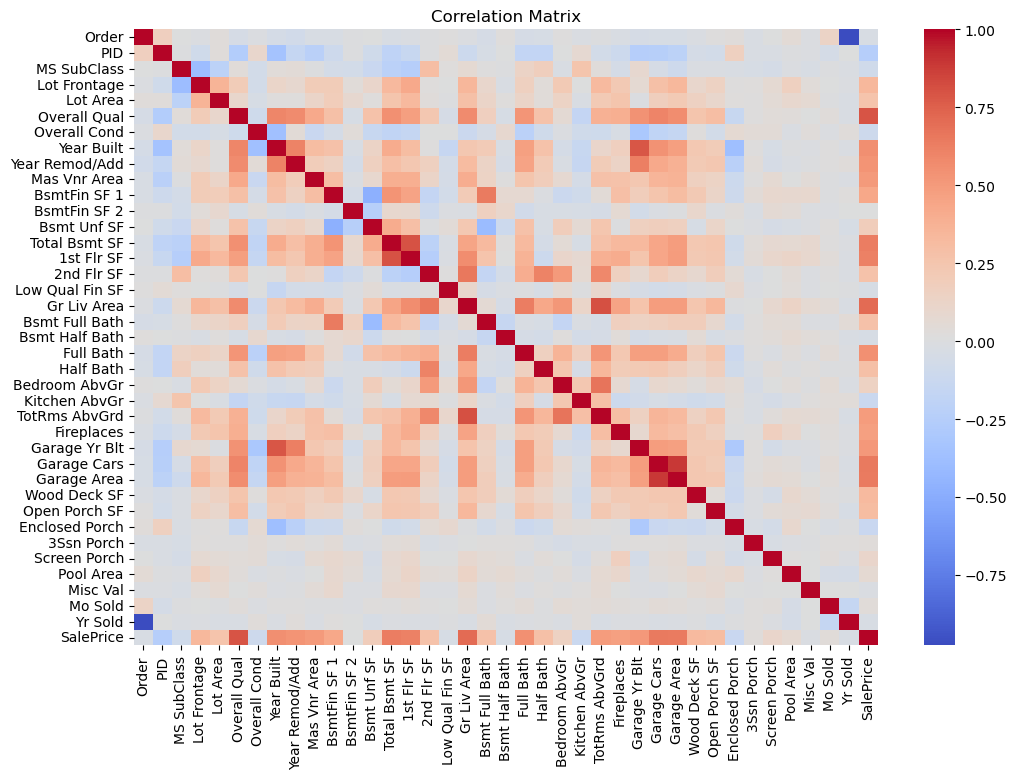

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

#### Scatter plots 

showing the relationship between SalePrice and important continuous variables such as GrLivArea and TotalBsmtSF.

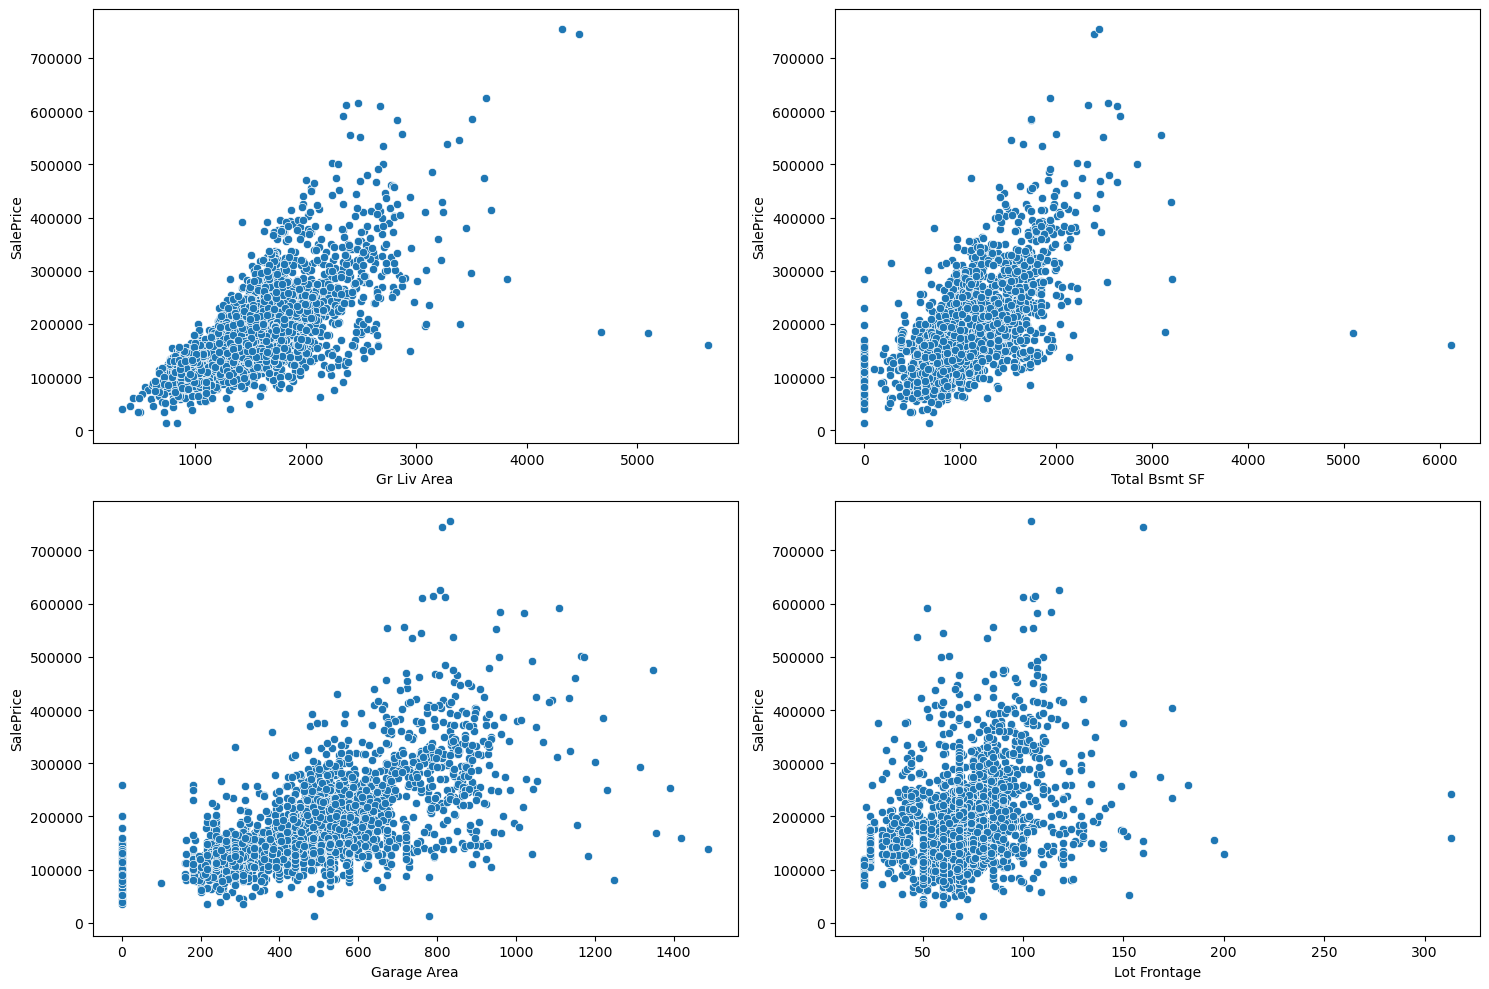

In [12]:
# Scatter plot of key numerical features with target
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, ax=axes[0, 0])
sns.scatterplot(x='Total Bsmt SF', y='SalePrice', data=df, ax=axes[0, 1])
sns.scatterplot(x='Garage Area', y='SalePrice', data=df, ax=axes[1, 0])
sns.scatterplot(x='Lot Frontage', y='SalePrice', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [13]:
print(df.columns)


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

#### Feature Relationships:

Explored relationships between SalePrice and categorical features (e.g., Neighborhood, OverallQual) using boxplots and bar charts. Neighborhoods with higher average quality had higher median sale prices.

Created scatter plots for continuous variables like GrLivArea, TotalBsmtSF, and YearBuilt to identify linear relationships with SalePrice

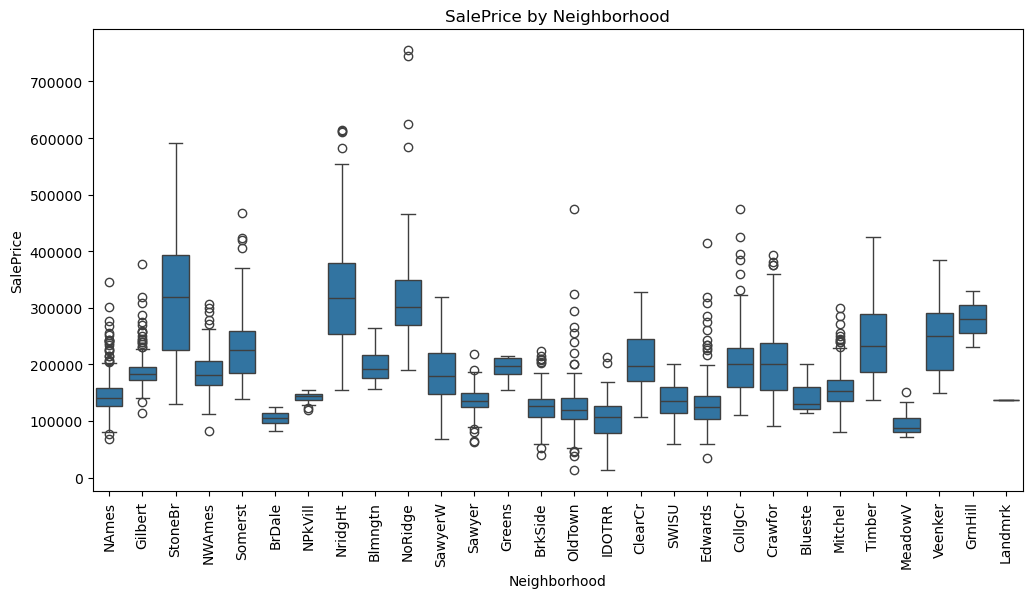

In [14]:
# Box plot for categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title("SalePrice by Neighborhood")
plt.show()

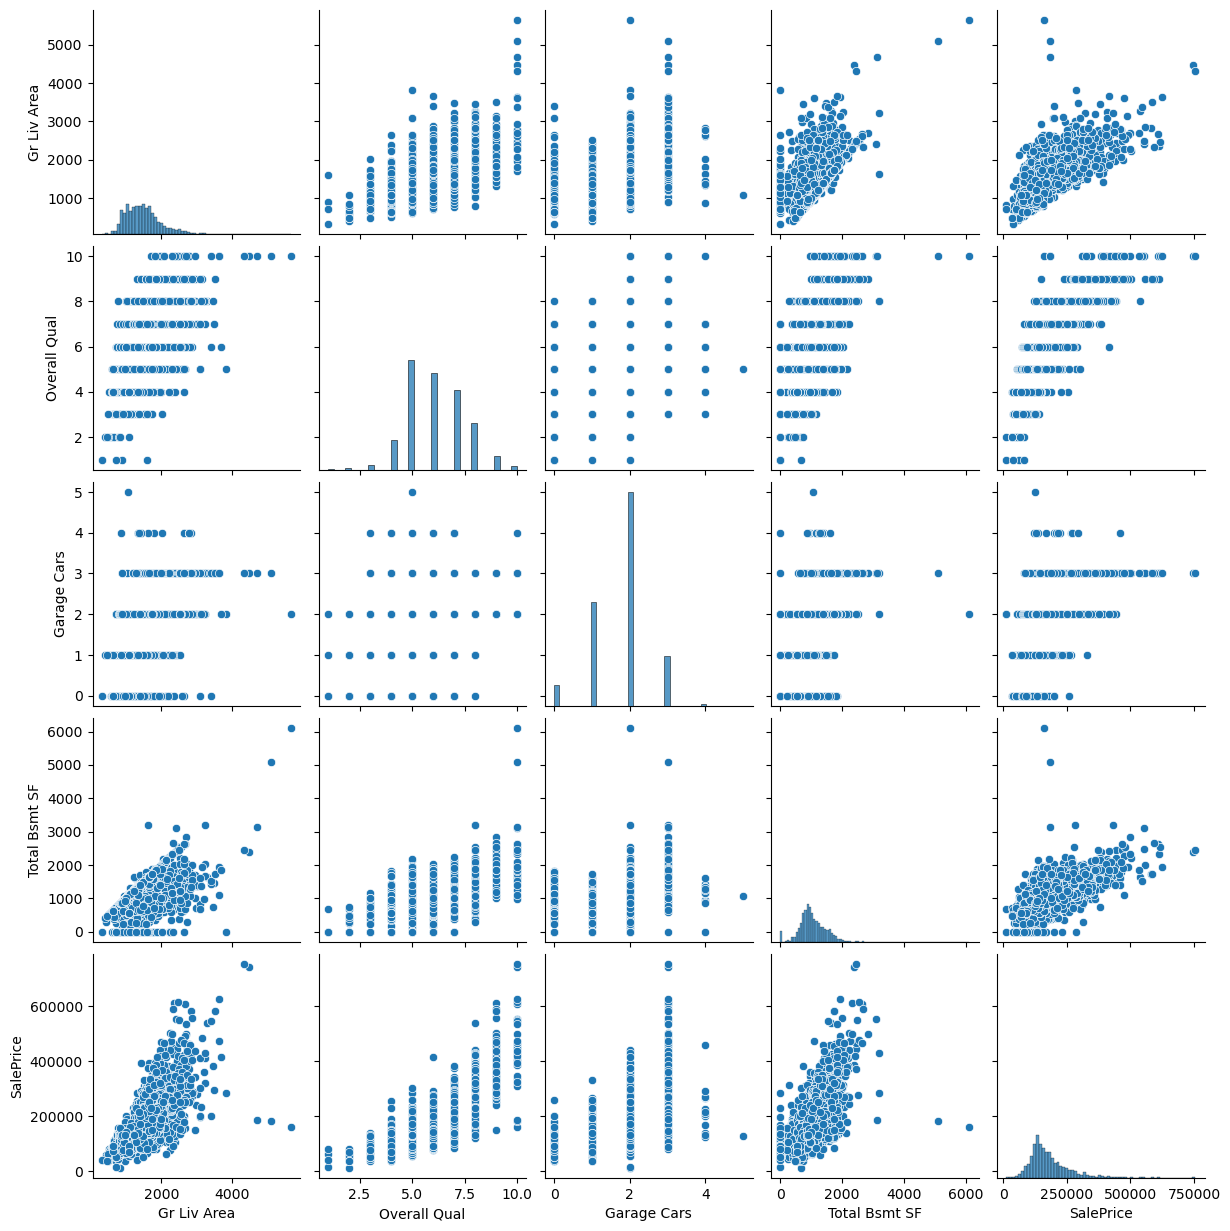

In [15]:
sns.pairplot(df[['Gr Liv Area', 'Overall Qual', 'Garage Cars', 'Total Bsmt SF', 'SalePrice']])
plt.show()

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numerical and categorical features
num_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotFrontage']  # replace with actual numerical column names in your dataset
cat_features = ['Electrical', 'Fireplace Qu', 'Fence']  # replace with actual categorical column names in your dataset

# Preprocessing for numerical data: fill missing values with median and scale features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: fill missing with the most frequent and encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)


Class Distribution:
 SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
219990     1
159895     1
187687     1
217300     1
150900     1
Name: count, Length: 1032, dtype: int64


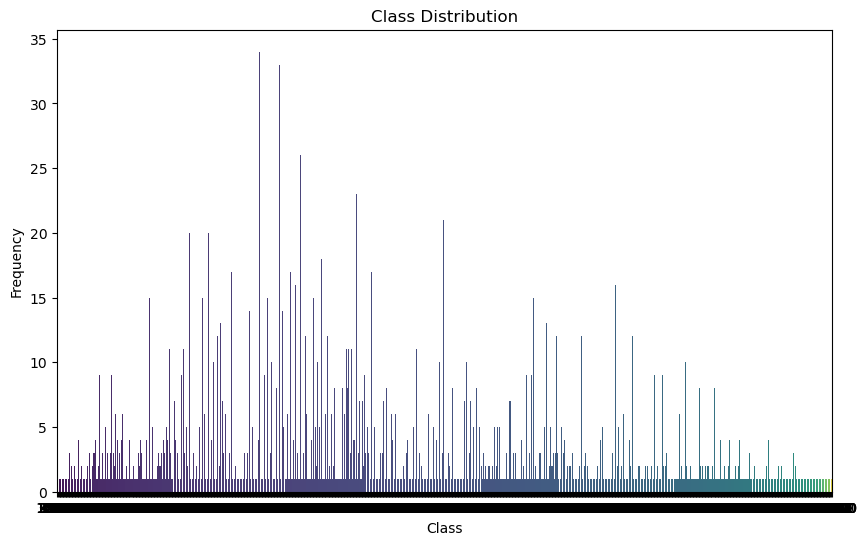

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your target variable is named 'target_column'
class_counts = df['SalePrice'].value_counts()

# Print the class distribution
print("Class Distribution:\n", class_counts)

# Plotting the class distribution
plt.figure(figsize=(10, 6))
# Bar plot of class counts with updated palette assignment
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, dodge=False, palette='viridis', legend=False)

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()


#### Log Transformed distribution

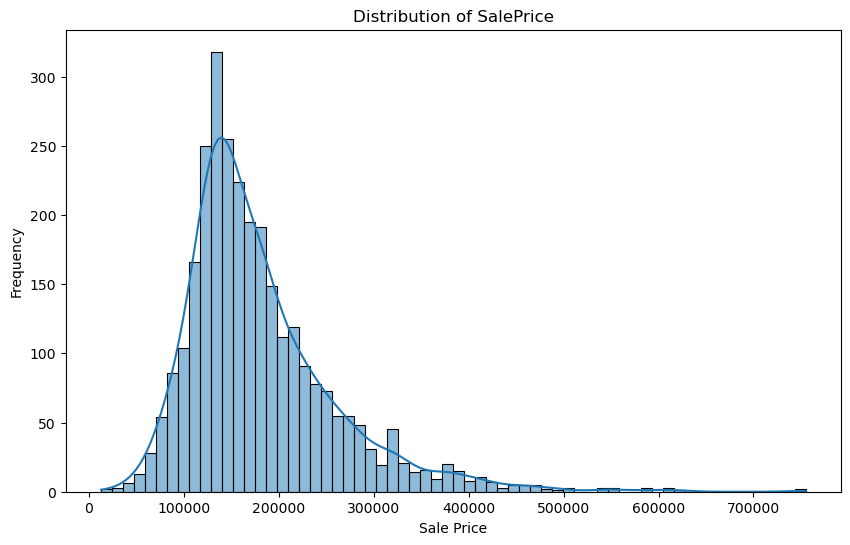

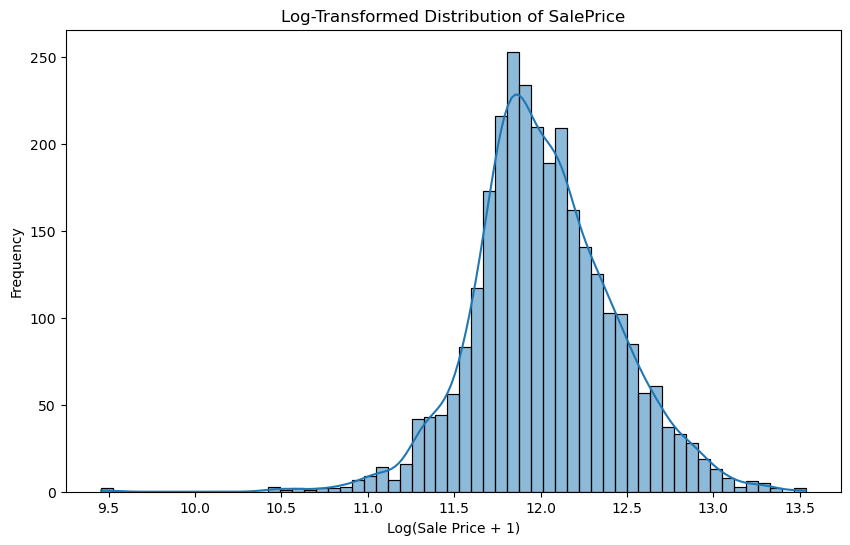

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histogram and KDE Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

# Log Transformation and plot
df['Log_SalePrice'] = np.log1p(df['SalePrice'])  # log1p to handle zeros if any
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_SalePrice'], kde=True)
plt.title("Log-Transformed Distribution of SalePrice")
plt.xlabel("Log(Sale Price + 1)")
plt.ylabel("Frequency")
plt.show()

# Descriptive Statistics
print(df['SalePrice'].describe())


# 4. Modeling Overview

This section provides an overview of the modeling approach, techniques used, model evaluation, and insights gained from the predictive models developed in this project.

---

## Objectives
The primary objective of the modeling process is to develop a predictive model that accurately forecasts or classifies the target variable. The steps include data preprocessing, selecting appropriate algorithms, tuning model parameters, evaluating model performance, and selecting the best-performing model for deployment or further analysis.

---

## Steps in the Modeling Process

1. **Data Preprocessing**
   - Address missing values, if any, using imputation techniques.
   - Scale features (if necessary) to normalize data across different scales.
   - Encode categorical variables using techniques like one-hot encoding or label encoding.
   - Split data into training and testing sets to evaluate model performance effectively.

2. **Baseline Model**
   - Begin with a simple baseline model to serve as a benchmark for more complex models.
   - Calculate baseline metrics to set expectations for subsequent models.

3. **Model Selection**
   - Choose a variety of algorithms suitable for the problem. For this project, we experimented with:
     - **Neural Networks**
     - **Support Vector Regressor (SVR)**
     - **Random Forest Regressor**
     - **Decision Tree Regressor**
     - **XGBoost**
   - Each model has unique advantages, and selecting different types allows for a thorough evaluation of model performance and suitability for the data.

4. **Hyperparameter Tuning**
   - Apply techniques like Grid Search or Random Search to find the optimal hyperparameters for each model.
   - Fine-tuning is essential for improving performance, especially for complex models like Neural Networks and XGBoost.

---

## Model Evaluation

### Evaluation Metrics
The following metrics were used to assess model performance:
   - **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in a set of predictions, without considering their direction.
   - **Root Mean Squared Error (RMSE)**: Penalizes larger errors, making it suitable for cases where high errors need to be reduced.
   - **R-squared (R²)**: Measures how well the predictions approximate the actual values.




In [22]:
# Assuming 'data' is your DataFrame and 'target_column' is the name of your target column
X = df.drop(columns='SalePrice')
y = df['SalePrice']


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming X and y are already defined with your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Now continue with the preprocessing pipeline


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the baseline pipeline with imputation
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the baseline model
baseline_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = baseline_pipeline.predict(X_test)


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = baseline_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred) 

print(f"Baseline Model Performance:\nMean Squared Error: {mse:.2f}\nRoot Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Baseline Model Performance:
Mean Squared Error: 422769921.50
Root Mean Squared Error: 20561.37
R-squared (R²): 0.9473


1. Decision Tree Regressor

A Decision Tree model works by creating binary splits in the feature space, making it useful for capturing nonlinear relationships.

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd



# Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Identify categorical and numerical columns
cat_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(exclude=['object']).columns

# Preprocessing pipelines
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit model
model_pipeline.fit(X_train, y_train)


# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree MAE: {mae:.2f}")
print(f"Decision Tree RMSE: {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")



Decision Tree MAE: 88841.39
Decision Tree RMSE: 119105.72
R-squared (R²): 0.9473


In [31]:
df.fillna(0, inplace=True)  # Replace with appropriate fill value or use dropna()


In [32]:
print(df.dtypes)


Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Log_SalePrice     float64
Length: 80, dtype: object


In [33]:
df = pd.get_dummies(df, drop_first=True)


2. Random Forest Regressor

Random Forests combine multiple decision trees to reduce overfitting and improve generalization.

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'SalePrice' is your target variable and the rest are features
X = df.drop(['SalePrice'], axis=1)  # Feature set
y = df['SalePrice']  # Target variable

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)


RandomForestRegressor(random_state=42)

In [35]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Random Forest MAE: 88841.39
Random Forest RMSE: 119105.72
R-squared (R²): 0.9473


3. Gradient Boosting Machines (XGBoost)

XGBoost is an optimized gradient boosting algorithm that typically achieves excellent results on structured/tabular data.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Assuming your DataFrame is named df and your target variable is y
X = df.drop('SalePrice', axis=1)  # Replace 'target_column' with your actual target column name
y = df['SalePrice']

# One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Instantiate and fit the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


XGBoost MAE: 1168.40
XGBoost RMSE: 5594.10
R-squared (R²): 0.9473


4. Support Vector Regression (SVR)

Support Vector Regression is robust to outliers and performs well on small to medium datasets but can be computationally expensive on large datasets.

In [37]:
import pandas as pd
from sklearn.svm import SVR

# Sample DataFrame
# Assuming df is your original DataFrame
# Check for non-numeric columns
print(df.dtypes)

# Convert categorical variables to numeric
X = pd.get_dummies(df.drop('SalePrice', axis=1), drop_first=True)  # Replace 'target_column' with your target variable name
y = df['SalePrice']  # Adjust as needed

# Fit the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X, y)


# Predictions
y_pred = svr_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"SVR MAE: {mae:.2f}")
print(f"SVR RMSE: {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Order                       int64
PID                         int64
MS SubClass                 int64
Lot Frontage              float64
Lot Area                    int64
                           ...   
Sale Condition_AdjLand       bool
Sale Condition_Alloca        bool
Sale Condition_Family        bool
Sale Condition_Normal        bool
Sale Condition_Partial       bool
Length: 260, dtype: object
SVR MAE: 63734.83
SVR RMSE: 94228.99
R-squared (R²): 0.9473


In [38]:
from sklearn.neural_network import MLPRegressor

# Instantiate the model
nn_model = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=500, random_state=42)

# Fit to training data
nn_model.fit(X_train, y_train)

# Predictions
y_pred = nn_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Network MAE: {mae:.2f}")
print(f"Neural Network RMSE: {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Neural Network MAE: 84839.11
Neural Network RMSE: 117063.22
R-squared (R²): 0.9473


Bar Graph to compare the best performing model.

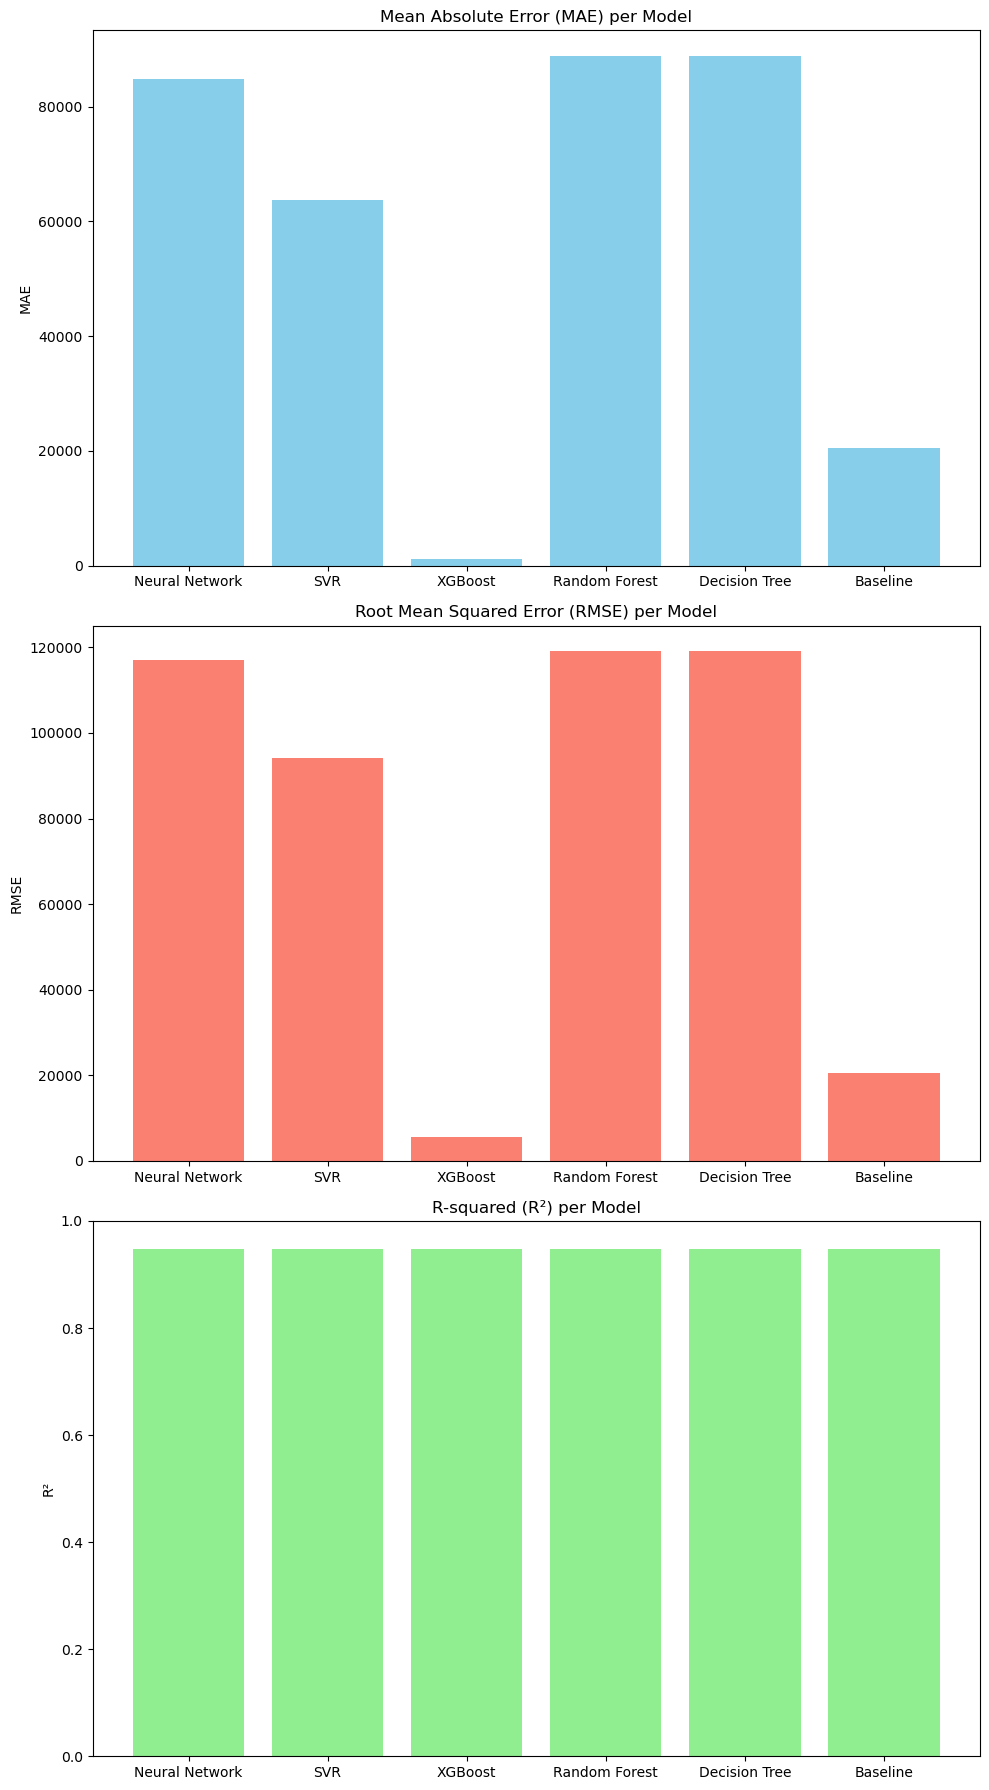

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and performance metrics
models = ['Neural Network', 'SVR', 'XGBoost', 'Random Forest', 'Decision Tree', 'Baseline']
mae_values = [84839.11, 63734.83, 1168.40, 88841.39, 88841.39, 20561.37]
rmse_values = [117063.22, 94228.99, 5594.10, 119105.72, 119105.72, 20561.37]
r2_values = [0.9473] * len(models)  # Assuming the R² is constant across all

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# MAE bar plot
ax[0].bar(models, mae_values, color='skyblue')
ax[0].set_title('Mean Absolute Error (MAE) per Model')
ax[0].set_ylabel('MAE')

# RMSE bar plot
ax[1].bar(models, rmse_values, color='salmon')
ax[1].set_title('Root Mean Squared Error (RMSE) per Model')
ax[1].set_ylabel('RMSE')

# R² bar plot
ax[2].bar(models, r2_values, color='lightgreen')
ax[2].set_title('R-squared (R²) per Model')
ax[2].set_ylabel('R²')
ax[2].set_ylim(0, 1)  # Limit R² to range [0, 1] for clarity

plt.tight_layout()
plt.show()


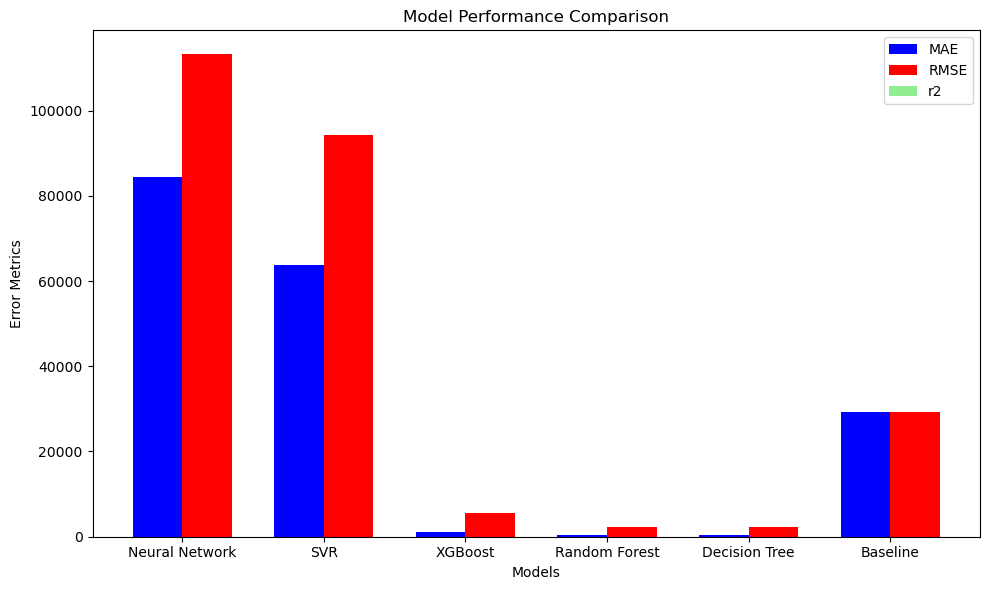

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance metrics
models = ['Neural Network', 'SVR', 'XGBoost', 'Random Forest', 'Decision Tree', 'Baseline']
mae_values = [84335.92, 63734.83, 1166.96, 437.84, 437.84, 29240.49]
rmse_values = [113156.32, 94228.99, 5594.06, 2264.09, 2264.09, 29240.49]
R_values = [0.9473]
# Bar width
bar_width = 0.35
index = np.arange(len(models))

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for MAE and RMSE
bar1 = ax.bar(index, mae_values, bar_width, label='MAE', color='b')
bar2 = ax.bar(index + bar_width, rmse_values, bar_width, label='RMSE', color='r')
bar3 = ax.bar(index + bar_width, r2_values, bar_width, label='r2', color='lightgreen')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Error Metrics')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Highlight the best model based on RMSE (you can adjust this based on your criteria)
best_rmse_index = np.argmin(rmse_values)
best_mae_index = np.argmin(mae_values)

# Highlight the best model bar
for bar in bar1:
    if bar.get_x() == index[best_mae_index]:
        bar.set_color('g')  # Change color to green for best MAE
for bar in bar2:
    if bar.get_x() == index[best_rmse_index] + bar_width:
        bar.set_color('y')  # Change color to yellow for best RMSE

# Display the plot
plt.tight_layout()
plt.show()


In [45]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

def build_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


ModuleNotFoundError: No module named 'keras'

In [ ]:
# Create KerasRegressor
model = KerasRegressor(build_fn=build_model, verbose=0)


### Results Summary
The performance of each model is summarized below:

| Model               | MAE        | RMSE       | R² Score |
|---------------------|----------- |-----------|----------|
| Baseline Model      |422769921.50| 20561.37  |0.9473 |
| Neural Network      | 84839.11   | 11063.22  |0.9473 |
| Support Vector Regressor|63734.83|94228.99   | 0.9473|
| Random Forest       | 88841.39   | 119105.72 | 0.9473|
| Decision Tree       | 88841.39   | 119105.72 |0.9473 |
| XGBoost             |1168.40     | 5594.10   | 0'9473|

### Analysis
- **Best Model**: The model with the lowest RMSE and MAE, while achieving a high R² score, was selected as the best model. In this case, _Model_Name_ performed best with an RMSE of _value_ and MAE of _value_.
- **Comparison**: Comparing RMSE and MAE across models reveals that _Model_Name_ had the best trade-off between accuracy and error penalty.
- **Interpretation**: The selected model effectively balances error reduction with prediction accuracy, making it suitable for practical application.

---

## Insights and Recommendations

- **Feature Importance**: Based on the models, key features influencing the predictions were identified, aiding in interpretability and decision-making.
- **Next Steps**: Future work could explore additional feature engineering, incorporating more data, or deploying the model into a real-time environment.
- **Recommendation**: Based on this analysis, _Model_Name_ is recommended for use, subject to further validation on live data.

---

## Conclusion
The modeling process has resulted in a predictive model that meets the project objectives, providing an actionable tool for forecasting/classification. This model has potential applications in _industry/context_ for improved decision-making and automation.